In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [2]:
onecall = True  # 8 days
#onecall = False # 5 days

In [3]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [4]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(url = base_url, headers = headers).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [5]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


KeyError: 'daily'

In [6]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,06/09,07:14,20:23,10:40,21:22,0.10,"{'day': 20.85, 'min': 14.81, 'max': 24.15, 'ni...","{'day': 20.35, 'night': 17.54, 'eve': 21.94, '...",1011,52,10.41,3.30,119,7.24,"[{'id': 804, 'main': 'Clouds', 'description': ...",100,0.00,4.85,NaN
1,07/09,07:16,20:21,11:49,21:37,0.13,"{'day': 19.7, 'min': 17.18, 'max': 26.76, 'nig...","{'day': 19.66, 'night': 18.23, 'eve': 18.97, '...",1009,74,14.81,4.57,251,10.23,"[{'id': 503, 'main': 'Rain', 'description': 'v...",100,1.00,3.35,27.96
2,08/09,07:17,20:18,12:59,21:55,0.16,"{'day': 18.04, 'min': 14.62, 'max': 19.91, 'ni...","{'day': 17.81, 'night': 16.03, 'eve': 16.01, '...",1009,73,12.89,6.87,210,14.88,"[{'id': 501, 'main': 'Rain', 'description': 'm...",100,1.00,2.05,15.17
3,09/09,07:19,20:16,14:11,22:18,0.19,"{'day': 20.18, 'min': 15.81, 'max': 21.62, 'ni...","{'day': 19.98, 'night': 15.34, 'eve': 19.08, '...",1010,66,13.46,5.78,220,12.97,"[{'id': 501, 'main': 'Rain', 'description': 'm...",55,1.00,3.25,5.26
4,10/09,07:20,20:14,15:23,22:51,0.22,"{'day': 18.53, 'min': 12.69, 'max': 18.53, 'ni...","{'day': 17.9, 'night': 16.22, 'eve': 17.37, 'm...",1015,56,9.36,5.02,253,9.76,"[{'id': 803, 'main': 'Clouds', 'description': ...",60,0.00,3.49,NaN
5,11/09,07:22,20:12,16:30,23:37,0.25,"{'day': 16.77, 'min': 13.42, 'max': 16.77, 'ni...","{'day': 15.96, 'night': 12.18, 'eve': 13.79, '...",1012,56,7.84,4.82,227,12.04,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.21,2.46,0.35
6,12/09,07:23,20:10,17:29,01:00,0.29,"{'day': 17.24, 'min': 13, 'max': 17.8, 'night'...","{'day': 15.99, 'night': 13.17, 'eve': 14.5, 'm...",1020,37,2.05,3.07,337,4.83,"[{'id': 500, 'main': 'Rain', 'description': 'l...",34,0.20,3.00,0.24
7,13/09,07:24,20:08,18:15,00:38,0.32,"{'day': 18.3, 'min': 11.84, 'max': 19.23, 'nig...","{'day': 17.13, 'night': 15.32, 'eve': 16.79, '...",1025,36,2.76,1.90,300,4.13,"[{'id': 803, 'main': 'Clouds', 'description': ...",52,0.00,3.00,NaN


In [7]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [8]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            07/09
sunrise       07:16
sunset        20:21
moonrise      11:49
moonset       21:37
moon_phase     0.13
pressure       1009
humidity         74
dew_point     14.81
wind_speed     4.57
wind_deg        251
wind_gust     10.23
pop             1.0
uvi            3.35
Name: 1, dtype: object

In [9]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [10]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        06/09
sunrise                                                   07:14
sunset                                                    20:23
moonrise                                                  10:40
moonset                                                   21:22
moon_phase                                                  0.1
temp          {'day': 20.85, 'min': 14.81, 'max': 24.15, 'ni...
feels_like    {'day': 20.35, 'night': 17.54, 'eve': 21.94, '...
pressure                                                   1011
humidity                                                     52
dew_point                                                 10.41
wind_speed                                                  3.3
wind_deg                                                    119
wind_gust                                                  7.24
weather       [{'id': 804, 'main': 'Clouds', 'description': ...
clouds                      

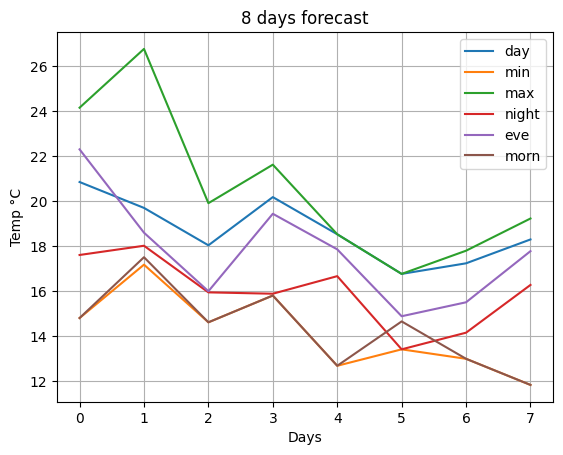

In [11]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [12]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1725667200, 'main': {'temp': 18.16, 'feels_like': 18.02, 'temp_min': 18.16, 'temp_max': 19.27, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 1001, 'humidity': 76, 'temp_kf': -1.11}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'clouds': {'all': 33}, 'wind': {'speed': 1, 'deg': 197, 'gust': 2.87}, 'visibility': 10000, 'pop': 0.39, 'rain': {'3h': 0.19}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-09-07 00:00:00'}, {'dt': 1725678000, 'main': {'temp': 17.46, 'feels_like': 17.53, 'temp_min': 17.38, 'temp_max': 17.46, 'pressure': 1010, 'sea_level': 1010, 'grnd_level': 1000, 'humidity': 87, 'temp_kf': 0.08}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'clouds': {'all': 67}, 'wind': {'speed': 2.21, 'deg': 70, 'gust': 4.78}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 3.06}, 'sys': {'pod': 'n'}, 'dt_txt': '2024-09-07 03:00:00'}, {'dt'

In [13]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1725667200
main          {'temp': 18.16, 'feels_like': 18.02, 'temp_min...
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                              {'all': 33}
wind                     {'speed': 1, 'deg': 197, 'gust': 2.87}
visibility                                                10000
pop                                                        0.39
rain                                               {'3h': 0.19}
sys                                                {'pod': 'n'}
dt_txt                                      2024-09-07 00:00:00
Name: 0, dtype: object


In [14]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [15]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   07/09 02:00  02:00     19.27     18.16
1   07/09 05:00  05:00     17.46     17.38
2   07/09 08:00  08:00     17.44     17.44
3   07/09 11:00  11:00     20.05     20.05
4   07/09 14:00  14:00     21.64     21.64
5   07/09 17:00  17:00     26.76     26.76
6   07/09 20:00  20:00     18.48     18.48
7   07/09 23:00  23:00     18.02     18.02
8   08/09 02:00  02:00     16.56     16.56
9   08/09 05:00  05:00     15.02     15.02
10  08/09 08:00  08:00     14.72     14.72
11  08/09 11:00  11:00     17.08     17.08
12  08/09 14:00  14:00     18.22     18.22
13  08/09 17:00  17:00     16.29     16.29
14  08/09 20:00  20:00     15.86     15.86
15  08/09 23:00  23:00     15.95     15.95
16  09/09 02:00  02:00     16.47     16.47
17  09/09 05:00  05:00     16.39     16.39
18  09/09 08:00  08:00     16.24     16.24
19  09/09 11:00  11:00     18.57     18.57
20  09/09 14:00  14:00     20.61     20.61
21  09/09 17:00  17:00     21.62     21.62
22  09/09 2

In [16]:
_5days['human_date']

0     07/09 02:00
1     07/09 05:00
2     07/09 08:00
3     07/09 11:00
4     07/09 14:00
5     07/09 17:00
6     07/09 20:00
7     07/09 23:00
8     08/09 02:00
9     08/09 05:00
10    08/09 08:00
11    08/09 11:00
12    08/09 14:00
13    08/09 17:00
14    08/09 20:00
15    08/09 23:00
16    09/09 02:00
17    09/09 05:00
18    09/09 08:00
19    09/09 11:00
20    09/09 14:00
21    09/09 17:00
22    09/09 20:00
23    09/09 23:00
24    10/09 02:00
25    10/09 05:00
26    10/09 08:00
27    10/09 11:00
28    10/09 14:00
29    10/09 17:00
30    10/09 20:00
31    10/09 23:00
32    11/09 02:00
33    11/09 05:00
34    11/09 08:00
35    11/09 11:00
36    11/09 14:00
37    11/09 17:00
38    11/09 20:00
39    11/09 23:00
Name: human_date, dtype: object

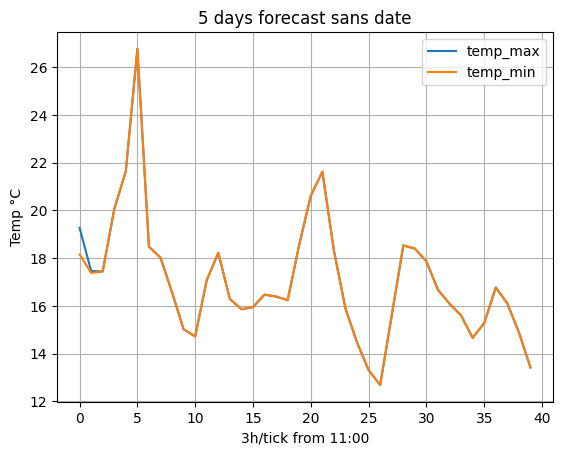

In [17]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [18]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

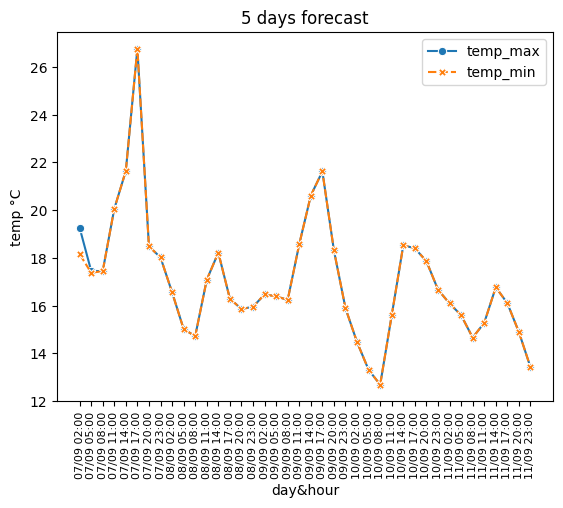

In [19]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

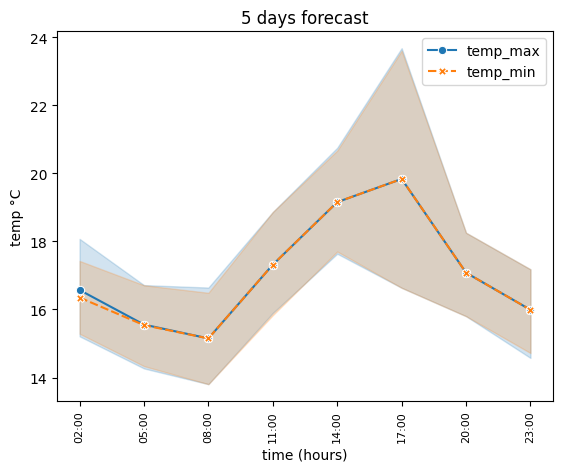

In [20]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 